In [7]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [8]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [9]:
import pandas as pd

In [34]:
df_2022 = pd.read_excel("chart.xlsx")
df_2025 = pd.read_excel("charttwo.xlsx")
display(df_2022)
display(df_2025)

,Hospital,PGY 1,PGY 2,PGY 3,PGY 4,PGY 5,PGY 6,PGY 7,PGY 8
0,Health and Hospitals (OLR proposed Pattern),"$70,281","$73,190","$79,004","$81,741","$84,137","$86,360.80","$90,806","$92,704"
1,Average,"$68,972","$73,465","$78,897","$81,637","$84,722","$87,498.00","$88,084","$91,805"


,Hospital,PGY 1,PGY 2,PGY 3,PGY 4,PGY 5,PGY 6,PGY 7
0,Health and Hospitals (OLR proposed pattern),"$76,984.83","$80,171.28","$86,539.52","$89,539.71","$92,161.70","$94,597.44","$99,466.59"
1,Average,"$82,572","$87,918","$94,414","$97,830","$101,391","$104,725",NaN


In [12]:
%%R

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [14]:
!pip install rpy2


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [33]:
%%R -o df_2022, df_2025

# Ensure the readxl library is available
library(readxl)

# Read data
df_2022 <- read_xlsx('chart.xlsx')
df_2025 <- read_xlsx('charttwo.xlsx')



print(df_2022)
print(df_2025)


# A tibble: 2 × 9
  Hospital       `PGY 1` `PGY 2` `PGY 3` `PGY 4` `PGY 5` `PGY 6` `PGY 7` `PGY 8`
  <chr>          <chr>   <chr>   <chr>   <chr>   <chr>   <chr>   <chr>   <chr>  
1 Health and Ho… $70,28… $73,19… $79,00… $81,74… $84,13… $86,36… $90,80… $92,70…
2 Average        $68,97… $73,46… $78,89… $81,63… $84,72… $87,49… $88,08… $91,80…
# A tibble: 2 × 8
  Hospital               `PGY 1` `PGY 2` `PGY 3` `PGY 4` `PGY 5` `PGY 6` `PGY 7`
  <chr>                  <chr>   <chr>   <chr>   <chr>   <chr>   <chr>   <chr>  
1 Health and Hospitals … $76,98… $80,17… $86,53… $89,53… $92,16… $94,59… $99,46…
2 Average                $82,57… $87,91… $94,41… $97,83… $101,3… $104,7… <NA>   


ValueError: The key must be a non-empty string.

In [37]:
# Convert the DataFrame from wide to long format
df_2022_long = pd.melt(df_2022, id_vars=['Hospital'], var_name='PGY Level', value_name='Salary')
df_2022_long['Salary'] = df_2022_long['Salary'].replace('[\$,]', '', regex=True).astype(float)
df_2022_long['year'] = 2022
df_2022_long

,Hospital,PGY Level,Salary,year
0,Health and Hospitals (OLR proposed Pattern),PGY 1,70281.0,2022
1,Average,PGY 1,68972.0,2022
2,Health and Hospitals (OLR proposed Pattern),PGY 2,73190.0,2022
3,Average,PGY 2,73465.0,2022
4,Health and Hospitals (OLR proposed Pattern),PGY 3,79004.0,2022
5,Average,PGY 3,78897.0,2022
6,Health and Hospitals (OLR proposed Pattern),PGY 4,81741.0,2022
7,Average,PGY 4,81637.0,2022
8,Health and Hospitals (OLR proposed Pattern),PGY 5,84137.0,2022
9,Average,PGY 5,84722.0,2022


In [38]:
# Convert the DataFrame from wide to long format
df_2025_long = pd.melt(df_2025, id_vars=['Hospital'], var_name='PGY Level', value_name='Salary')
df_2025_long['Salary'] = df_2025_long['Salary'].replace('[\$,]', '', regex=True).astype(float)
df_2025_long['year'] = 2025
df_2025_long

,Hospital,PGY Level,Salary,year
0,Health and Hospitals (OLR proposed pattern),PGY 1,76984.83,2025
1,Average,PGY 1,82572.00,2025
2,Health and Hospitals (OLR proposed pattern),PGY 2,80171.28,2025
3,Average,PGY 2,87918.00,2025
4,Health and Hospitals (OLR proposed pattern),PGY 3,86539.52,2025
5,Average,PGY 3,94414.00,2025
6,Health and Hospitals (OLR proposed pattern),PGY 4,89539.71,2025
7,Average,PGY 4,97830.00,2025
8,Health and Hospitals (OLR proposed pattern),PGY 5,92161.70,2025
9,Average,PGY 5,101391.00,2025


In [40]:
# vetically combine df_2022 and df_2025
df_long = pd.concat([df_2022_long,df_2025_long])

In addition: Warning messages:
1: Removed 1 row containing missing values (`geom_line()`). 
2: Removed 1 rows containing missing values (`geom_point()`). 


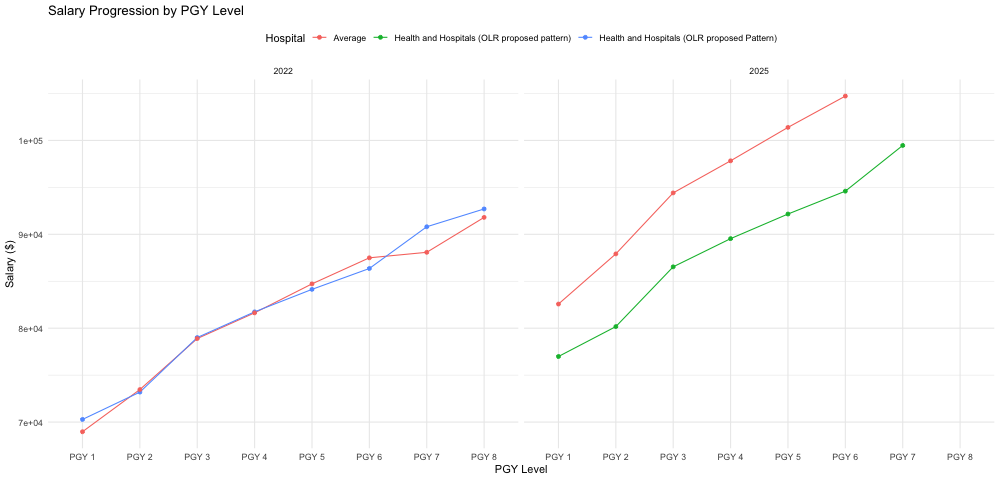

In [47]:
%%R -i df_long -w 1000

plot = (
    ggplot(df_long, aes(x=`PGY Level`, y=Salary, color=Hospital, group=Hospital))
    + geom_line()
    + geom_point()
    + labs(title='Salary Progression by PGY Level', x='PGY Level', y='Salary ($)')
    + facet_wrap(~year)
    + theme_minimal()
    + theme(
        legend.position='top'
    )
)

print(plot)

In addition: Warning messages:
1: Removed 1 row containing missing values (`geom_line()`). 
2: Removed 1 rows containing missing values (`geom_point()`). 


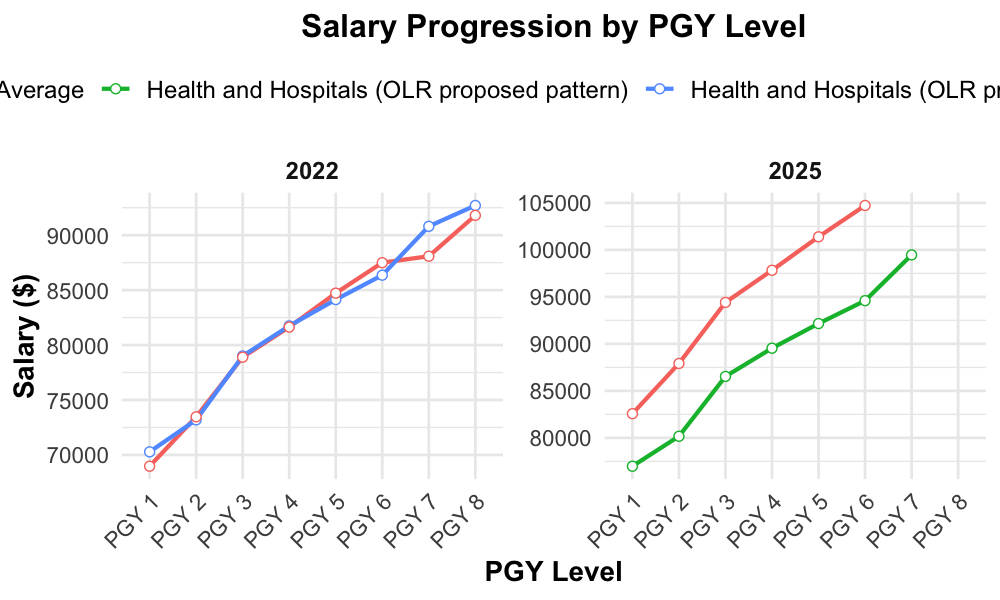

In [50]:
%%R -i df_long -w 1000 -h 600 -r 144

plot = (
    ggplot(df_long, aes(x=`PGY Level`, y=Salary, color=Hospital, group=Hospital))
    + geom_line(size=1)  # Increase line thickness for better visibility
    + geom_point(size=2, shape=21, fill="white")  # Increase point size and add fill for clarity
    + labs(title='Salary Progression by PGY Level', x='PGY Level', y='Salary ($)')
    + facet_wrap(~year, scales='free_y')  # Adjust scales if needed to ensure each plot is clear
    + theme_minimal(base_size = 14)  # Increase base font size for better readability
    + theme(
        legend.position='top',
        legend.title=element_blank(),  # Remove legend title for cleaner look
        legend.text=element_text(size=12),  # Adjust legend text size
        axis.title.x=element_text(size=14, face="bold"),  # Make axis labels bold and larger
        axis.title.y=element_text(size=14, face="bold"),
        axis.text.x=element_text(angle=45, hjust=1),  # Improve x-axis labels readability
        plot.title=element_text(size=16, face="bold", hjust=0.5),  # Center and bold plot title
        strip.text.x=element_text(size=12, face="bold")  # Make facet labels larger and bold
    )
)

print(plot)


In addition: Warning messages:
1: Removed 1 row containing missing values (`geom_line()`). 
2: Removed 1 rows containing missing values (`geom_point()`). 


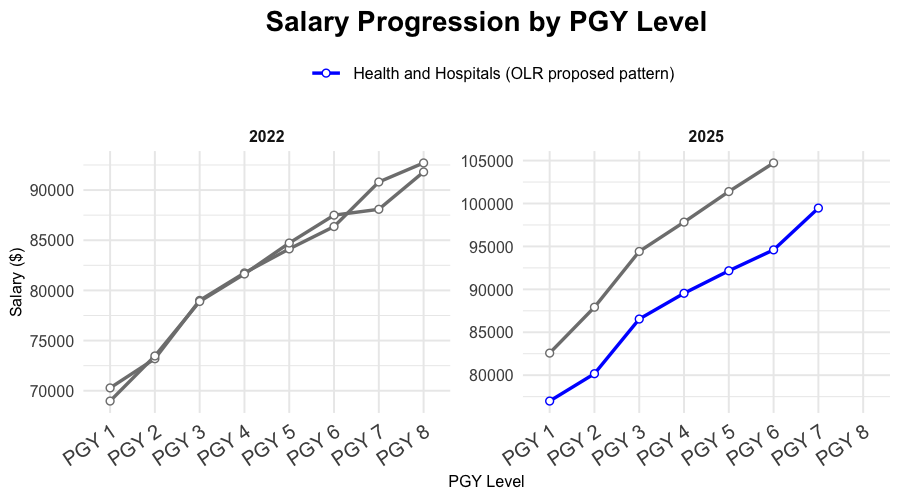

In [57]:
%%R -i df_long -w 900 -h 500 -r 144  # Adjust the size parameters as needed

# Define a color palette that will be consistent across plots
color_palette <- c("Health and Hospitals (OLR proposed pattern)" = "blue",
                   "Health and Hospitals (OLR pi)" = "green")

plot = (
    ggplot(df_long, aes(x=`PGY Level`, y=Salary, color=Hospital, group=Hospital))
    + geom_line(size=0.8)  # Adjust line thickness
    + geom_point(size=1.5, shape=21, fill="white")  # Adjust point size and fill
    + labs(title='Salary Progression by PGY Level', x='PGY Level', y='Salary ($)')
    + facet_wrap(~year, scales='free_y')  # Keep scales free to adjust to each facet
    + theme_minimal(base_size = 10)  # Adjust base font size
    + theme(
        legend.position='top',
        legend.title=element_blank(),  # Hide legend title
        legend.text=element_text(size=8),  # Adjust legend text size
        axis.title.x=element_text(size=8),  # Adjust axis labels
        axis.title.y=element_text(size=8),
        axis.text.x=element_text(angle=34, hjust=1, size=10),  # Adjust x-axis labels size
        plot.title=element_text(size=14, face="bold", hjust=0.5),  # Adjust plot title
        strip.text.x=element_text(size=8, face="bold")  # Adjust facet labels
    )
    + scale_color_manual(values=color_palette)  # Use the defined color palette
)

print(plot)


In addition: Warning messages:
1: Removed 1 row containing missing values (`geom_line()`). 
2: Removed 1 rows containing missing values (`geom_point()`). 


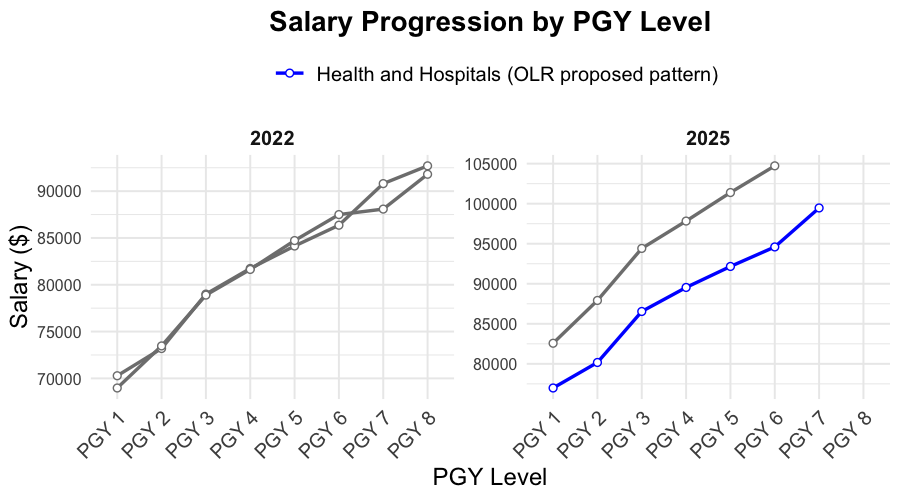

In [58]:
%%R -i df_long -w 900 -h 500 -r 144  # Adjust the size parameters as needed

# Define a manual color scale to ensure consistency
color_scale <- c("Health and Hospitals (OLR proposed pattern)" = "blue", 
                 "Health and Hospitals (OLR pi)" = "green")

plot = (
    ggplot(df_long, aes(x=`PGY Level`, y=Salary, color=Hospital, group=Hospital))
    + geom_line(size=0.8)  # Adjust line thickness
    + geom_point(size=1.5, shape=21, fill="white")  # Adjust point size and fill
    + labs(title='Salary Progression by PGY Level', x='PGY Level', y='Salary ($)')
    + facet_wrap(~year, scales='free_y')  # Keep scales free to adjust to each facet
    + theme_minimal(base_size = 10)  # Adjust base font size
    + theme(
        legend.position='top',
        legend.title=element_blank(),  # Hide legend title
        legend.text=element_text(size=10),  # Adjust legend text size
        axis.title.x=element_text(size=12),  # Adjust axis labels
        axis.title.y=element_text(size=12),
        axis.text.x=element_text(angle=45, hjust=1, size=10),  # Adjust x-axis labels size
        plot.title=element_text(size=14, face="bold", hjust=0.5),  # Adjust plot title
        strip.text.x=element_text(size=10, face="bold")  # Adjust facet labels
    )
    + scale_color_manual(values=color_scale)  # Use the defined color scale
)

print(plot)
